In [1]:
import pandas as pd
import plotly.express as px
import os

In [2]:
folder_dir = r'D:\BUL\lab-1\result-two'
file_list = os.listdir(folder_dir)

df = pd.DataFrame(columns=['file_name', 'microseconds', 'distance[cm]'])

for file in file_list:
    if file.endswith('.csv'):
        file_name = file.split('.')[0]
        t = pd.read_csv(os.path.join(folder_dir, file))
        t['file_name'] = file_name
        #rename raw data to microseconds
        t = t.rename(columns={'raw_data': 'microseconds'})
        df = pd.concat([df, t], ignore_index=True)
        filename = file.split('.')[0]
        df = df.drop(columns=['Unnamed: 0'])

display(df)

,file_name,microseconds,distance[cm]
0,0cm,168825,2870.025
1,0cm,169562,2882.554
2,0cm,168985,2872.745
3,0cm,169451,2880.667
4,0cm,169497,2881.449
...,...,...,...
1207,90cm,5142,87.414
1208,90cm,5141,87.397
1209,90cm,5142,87.414
1210,90cm,5142,87.414


In [3]:
for row in df.iterrows():
    expected_distance = int(row[1]['file_name'].split('cm')[0])
    df.loc[row[0], 'expected_distance[cm]'] = expected_distance
df['speed[m/s]'] = df['expected_distance[cm]'] * 2 * 10000 / (df['microseconds'])

display(df)

,file_name,microseconds,distance[cm],expected_distance[cm],speed[m/s]
0,0cm,168825,2870.025,0.0,0.0
1,0cm,169562,2882.554,0.0,0.0
2,0cm,168985,2872.745,0.0,0.0
3,0cm,169451,2880.667,0.0,0.0
4,0cm,169497,2881.449,0.0,0.0
...,...,...,...,...,...
1207,90cm,5142,87.414,90.0,350.058343
1208,90cm,5141,87.397,90.0,350.126435
1209,90cm,5142,87.414,90.0,350.058343
1210,90cm,5142,87.414,90.0,350.058343


In [4]:
#creat a histogram per file_name
for file_name in df['file_name'].unique():
    df_temp = df[df['file_name'] == file_name]
    fig = px.histogram(df_temp, x='microseconds', nbins=100)
    fig.update_layout(title_text=file_name)
    fig.show()

In [11]:
display(df)

,file_name,microseconds,distance[cm],expected_distance[cm],speed[m/s]
0,0cm,168825.0,2870.025,0.0,0.0
1,0cm,169562.0,2882.554,0.0,0.0
2,0cm,168985.0,2872.745,0.0,0.0
3,0cm,169451.0,2880.667,0.0,0.0
4,0cm,169497.0,2881.449,0.0,0.0
...,...,...,...,...,...
1207,90cm,5142.0,87.414,90.0,350.058343
1208,90cm,5141.0,87.397,90.0,350.126435
1209,90cm,5142.0,87.414,90.0,350.058343
1210,90cm,5142.0,87.414,90.0,350.058343


In [5]:
display(df)

,file_name,microseconds,distance[cm],expected_distance[cm],speed[m/s]
0,0cm,168825,2870.025,0.0,0.0
1,0cm,169562,2882.554,0.0,0.0
2,0cm,168985,2872.745,0.0,0.0
3,0cm,169451,2880.667,0.0,0.0
4,0cm,169497,2881.449,0.0,0.0
...,...,...,...,...,...
1207,90cm,5142,87.414,90.0,350.058343
1208,90cm,5141,87.397,90.0,350.126435
1209,90cm,5142,87.414,90.0,350.058343
1210,90cm,5142,87.414,90.0,350.058343


In [12]:
#delete 0cm data
df = df[df['expected_distance[cm]'] != 0.0]
display(df)

,file_name,microseconds,distance[cm],expected_distance[cm],speed[m/s]
101,100cm,5669.0,96.373,100.0,352.795908
102,100cm,5669.0,96.373,100.0,352.795908
103,100cm,5669.0,96.373,100.0,352.795908
104,100cm,5693.0,96.781,100.0,351.308625
105,100cm,5669.0,96.373,100.0,352.795908
...,...,...,...,...,...
1207,90cm,5142.0,87.414,90.0,350.058343
1208,90cm,5141.0,87.397,90.0,350.126435
1209,90cm,5142.0,87.414,90.0,350.058343
1210,90cm,5142.0,87.414,90.0,350.058343


In [13]:
for file_name in df['file_name'].unique():
    df_temp = df[df['file_name'] == file_name]
    fig = px.histogram(df_temp, x='microseconds', nbins=100)
    fig.update_layout(title_text=file_name)
    fig.show()

In [24]:
display(df)

,file_name,microseconds,distance[cm],expected_distance[cm],speed[m/s]
101,100cm,5669.0,96.373,100.0,352.795908
102,100cm,5669.0,96.373,100.0,352.795908
103,100cm,5669.0,96.373,100.0,352.795908
104,100cm,5693.0,96.781,100.0,351.308625
105,100cm,5669.0,96.373,100.0,352.795908
...,...,...,...,...,...
1207,90cm,5142.0,87.414,90.0,350.058343
1208,90cm,5141.0,87.397,90.0,350.126435
1209,90cm,5142.0,87.414,90.0,350.058343
1210,90cm,5142.0,87.414,90.0,350.058343


In [32]:
df['expected_microseconds'] = df['expected_distance[cm]'] * 2 * 1000000 / (34300)
df['relative_error'] = (df['microseconds'] - df['expected_microseconds']) / df['expected_microseconds']

display(df)

,file_name,microseconds,distance[cm],expected_distance[cm],speed[m/s],expected_microseconds,relative_error
101,100cm,5669.0,96.373,100.0,352.795908,5830.903790,-0.027767
102,100cm,5669.0,96.373,100.0,352.795908,5830.903790,-0.027767
103,100cm,5669.0,96.373,100.0,352.795908,5830.903790,-0.027767
104,100cm,5693.0,96.781,100.0,351.308625,5830.903790,-0.023651
105,100cm,5669.0,96.373,100.0,352.795908,5830.903790,-0.027767
...,...,...,...,...,...,...,...
1207,90cm,5142.0,87.414,90.0,350.058343,5247.813411,-0.020163
1208,90cm,5141.0,87.397,90.0,350.126435,5247.813411,-0.020354
1209,90cm,5142.0,87.414,90.0,350.058343,5247.813411,-0.020163
1210,90cm,5142.0,87.414,90.0,350.058343,5247.813411,-0.020163


In [40]:
fig = px.line(df, x='expected_microseconds', y='microseconds', color='file_name')
fig.show()

In [23]:
#take meas 0cm away from the table

fig = px.scatter(df, x='expected_distance[cm]', y='microseconds', color='file_name')
display(fig)
# show trend
df['speed[m/s]'] = df['expected_distance[cm]'] * 2 * 10000 / (df['microseconds'])
fig = px.scatter(df, x='expected_distance[cm]', y='speed[m/s]', color='file_name')
display(fig)

In [14]:
speed_of_sound = 34300 #cm/s
microseconds_to_100cm = 100 * 2 * 10000 / speed_of_sound
print(microseconds_to_100cm)

df

58.309037900874635


In [8]:
#plot mean values per file
print(type(df['microseconds'][0]))
df['microseconds'] = df['microseconds'].astype('float64')
#mean of microseconds
df_mean = df.groupby('file_name').mean()

# #drop 0cm distance
df_mean = df_mean.drop(index='0cm')

# # drop 1cm distance
df_mean = df_mean.drop(index='1cm')
df_mean = df_mean.reset_index().sort_values(by='distance[cm]')
#add the actual distance as a secondary row
df_mean['real_distance[cm]'] = df_mean['file_name'].apply(lambda x: int(x.split('cm')[0]))
df_mean['expected_microseconds'] = df_mean['real_distance[cm]'] * 2 * 1000000 / 34300

display(df_mean)
# fig = px.scatter(df_mean, x='real_distance[cm]', y='distance[cm]', trendline='ols')
# fig.update_layout(title_text='real_distance[cm] vs distance[cm] (mean)')
# fig.show()

# fig = px.scatter(df_mean, x='microseconds', y='expected_microseconds', trendline='ols')
# fig.update_layout(title_text='microseconds vs expected_microseconds')
# fig.show()


df_mean['relative_error_microseconds'] = (df_mean['microseconds'] - df_mean['expected_microseconds']) / df_mean['expected_microseconds']
df_mean['relative_error_microseconds_percent'] = df_mean['relative_error_microseconds'] * 100
df_microseconds = df_mean[['real_distance[cm]', 'microseconds', 'expected_microseconds', 'relative_error_microseconds', 'relative_error_microseconds_percent']]

#drop file_name 1cm


# fig = px.scatter(df_microseconds, x='real_distance[cm]', y='relative_error_microseconds_percent', trendline='ols')
# fig.update_layout(title_text='relative_error_microseconds_percent')
# fig.show()

# print(df_microseconds.to_markdown())
# df_microseconds.to_csv('df_microseconds.csv')

<class 'numpy.float64'>


C:\Users\celes\AppData\Local\Temp\ipykernel_28696\951677876.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,file_name,microseconds,distance[cm],expected_distance[cm],real_distance[cm],expected_microseconds
1,10cm,550.831683,9.364139,10.0,10,583.090379
2,20cm,1117.158416,18.991693,20.0,20,1166.180758
3,30cm,1696.782178,28.845297,30.0,30,1749.271137
4,40cm,2253.693069,38.312782,40.0,40,2332.361516
5,50cm,2832.079208,48.145347,50.0,50,2915.451895
6,60cm,3417.099010,58.090683,60.0,60,3498.542274
7,70cm,3960.316832,67.325386,70.0,70,4081.632653
8,80cm,4549.039604,77.333673,80.0,80,4664.723032
9,90cm,5145.881188,87.479980,90.0,90,5247.813411
0,100cm,5665.732673,96.317455,100.0,100,5830.903790


|    |   real_distance[cm] |   microseconds |   expected_microseconds |   relative_error_microseconds |   relative_error_microseconds_percent |
|---:|--------------------:|---------------:|------------------------:|------------------------------:|--------------------------------------:|
|  1 |                  10 |        550.832 |                  583.09 |                    -0.0553237 |                              -5.53237 |
|  2 |                  20 |       1117.16  |                 1166.18 |                    -0.0420367 |                              -4.20367 |
|  3 |                  30 |       1696.78  |                 1749.27 |                    -0.0300062 |                              -3.00062 |
|  4 |                  40 |       2253.69  |                 2332.36 |                    -0.0337291 |                              -3.37291 |
|  5 |                  50 |       2832.08  |                 2915.45 |                    -0.0285968 |                              -2.

In [8]:
#speed of sound by mean 
df_speed = df[['expected_distance[cm]', 'speed[m/s]']].groupby('expected_distance[cm]').mean()
#drop were expected_distance is 0.0
df_speed = df_speed.drop(index=0.0)
df_speed = df_speed.drop(index=1.0)
fig = px.scatter(df_speed, x=df_speed.index, y='speed[m/s]', trendline='ols')
fig.update_layout(title_text='speed of sound by mean')
#add more ticks in x axis
fig.update_xaxes(dtick=10)
fig.update_yaxes(dtick=5)
fig.show()
display(df_speed)
# fig = px.scatter(df_speed, x="distance[cm]", y="microseconds", trendline="ols")

df_mean_microseconds = df[['expected_distance[cm]', 'microseconds']].groupby('expected_distance[cm]').mean()
df_mean_microseconds = df_mean_microseconds.drop(index=[0.0, 1.0])
display(df_mean_microseconds)

fig = px.scatter(df_mean_microseconds, x=df_mean_microseconds.index, y='microseconds', trendline='ols')
fig.update_layout(title_text='tof by expected_measurement')
#add more ticks in x axis
fig.show()

,speed[m/s]
expected_distance[cm],
10.0,390.617490
20.0,364.851508
30.0,359.884214
40.0,355.891893
50.0,353.316110
60.0,353.220946
70.0,351.546911
80.0,351.632740
90.0,351.634110


,microseconds
expected_distance[cm],
10.0,512.009901
20.0,1096.336634
30.0,1667.257426
40.0,2247.881188
50.0,2830.326733
60.0,3397.316832
70.0,3982.425743
80.0,4550.277228
90.0,5118.990099


In [9]:
#relative error to the speed of sound 
df_speed['relative_error'] = (df_speed['speed[m/s]'] - 343) / 343
#relative error as percentage
df_speed['relative_error[%]'] = df_speed['relative_error'] * 100
fig = px.scatter(df_speed, x=df_speed.index, y='relative_error', trendline='ols')
fig.update_layout(title_text='relative error to the speed of sound')
#print to markdown
print(df_speed.to_markdown())

|   expected_distance[cm] |   speed[m/s] |   relative_error |   relative_error[%] |
|------------------------:|-------------:|-----------------:|--------------------:|
|                      10 |      390.617 |        0.138827  |            13.8827  |
|                      20 |      364.852 |        0.063707  |             6.3707  |
|                      30 |      359.884 |        0.0492251 |             4.92251 |
|                      40 |      355.892 |        0.0375857 |             3.75857 |
|                      50 |      353.316 |        0.0300761 |             3.00761 |
|                      60 |      353.221 |        0.0297987 |             2.97987 |
|                      70 |      351.547 |        0.0249181 |             2.49181 |
|                      80 |      351.633 |        0.0251683 |             2.51683 |
|                      90 |      351.634 |        0.0251723 |             2.51723 |
|                     100 |      350.578 |        0.0220933 |             2.

In [ ]:
#calculate the relative error for each file
df_mean['relative_error'] = (df_mean['distance[cm]'] - df_mean['real_distance[cm]']) / df_mean['real_distance[cm]']
fig = px.scatter(df_mean, x='real_distance[cm]', y='relative_error')
fig.show()
#make a table with the relative error for markdown
print(df_mean[['real_distance[cm]', 'relative_error']].round(3).to_markdown(index=False))


In [18]:
result_dir = r'D:\BUL\lab-1'

files = os.listdir(result_dir)
count_diagonal = 0
count_horizontal = 0
df = pd.DataFrame(columns=['file_name', 'microseconds', 'distance[cm]'])
for file in files:
    if file.endswith('diagonal.csv'):
        count_diagonal += 1
        print('diagponal: ', file)
    elif file.endswith('.csv'):
        count_horizontal += 1
        print('horizontal: ', file)
    

horizontal:  100cm.csv
horizontal:  50cm0.csv
diagponal:  50cm0diagonal.csv
horizontal:  50cm1.csv
horizontal:  50cm10.csv
diagponal:  50cm10diagonal.csv
horizontal:  50cm11.csv
diagponal:  50cm11diagonal.csv
horizontal:  50cm12.csv
diagponal:  50cm12diagonal.csv
horizontal:  50cm13.csv
diagponal:  50cm13diagonal.csv
diagponal:  50cm1diagonal.csv
horizontal:  50cm2.csv
diagponal:  50cm2diagonal.csv
horizontal:  50cm3.csv
diagponal:  50cm3diagonal.csv
horizontal:  50cm4.csv
diagponal:  50cm4diagonal.csv
horizontal:  50cm5.csv
diagponal:  50cm5diagonal.csv
horizontal:  50cm6.csv
diagponal:  50cm6diagonal.csv
horizontal:  50cm7.csv
diagponal:  50cm7diagonal.csv
horizontal:  50cm8.csv
diagponal:  50cm8diagonal.csv
horizontal:  50cm9.csv
diagponal:  50cm9diagonal.csv
horizontal:  50cmcircular.csv
diagponal:  50cmdiagonal.csv
count_diagonal:  15
count_horizontal:  16


In [112]:
files_dir = r'D:\BUL\lab-1\results_sideways'
files = os.listdir(files_dir)

map = {
  "10": { "x": 1, "y": 0, "distance[cm]": 62.26 },
  "11": { "x": 2, "y": 0, "distance[cm]": 78.38 },
  "1": { "x": 0, "y": 1 , "distance[cm]": 26.95},
  "3": { "x": 1, "y": 1 , "distance[cm]": 45.96},
  "5": { "x": 2, "y": 1 , "distance[cm]": 66.18},
  "7": { "x": 3, "y": 1 , "distance[cm]": 86.78},
  "9": { "x": 4, "y": 1 , "distance[cm]": 107.53},
  "0": { "x": 0, "y": 2 , "distance[cm]": 26.95},
  "2": { "x": 1, "y": 2 , "distance[cm]": 45.96},
  "4": { "x": 2, "y": 2 , "distance[cm]": 66.18},
  "6": { "x": 3, "y": 2 , "distance[cm]": 86.78},
  "8": { "x": 4, "y": 2 , "distance[cm]": 107.53},
  "12": { "x": 1, "y": 3 , "distance[cm]": 62.26},
  "13": { "x": 2, "y": 3 , "distance[cm]": 78.38},
}

df = pd.DataFrame(columns=['x', 'y', 'mean distance[cm]', 'type', 'expected_distance[cm]', 'error'])

for file in files:
    if file.endswith('.csv'):
        diagonal = False
        if 'diagonal' in file:
            diagonal = True
        if 'circular' in file:
            continue
        t = pd.read_csv(os.path.join(files_dir, file))
        t.drop(columns=['Unnamed: 0'], inplace=True)
        mean = t['distance[cm]'].mean()
        # print(file, mean)
        number = file.split('cm')[1].split('.')[0].split('diagonal')[0]
        # print(number)
        if number not in map:
            continue
        x = map[number]['x']
        y = map[number]['y']
        expected_distance = map[number]['distance[cm]']
        error = (mean - expected_distance) / expected_distance
        df = pd.concat([df, pd.DataFrame([[x, y, mean, 'diagonal' if diagonal else 'horizontal', expected_distance, error]], columns=['x', 'y', 'mean distance[cm]', 'type', 'expected_distance[cm]', 'error'])], ignore_index=True)
        
display(df)

,x,y,mean distance[cm],type,expected_distance[cm],error
0,0,2,22.214455,horizontal,26.95,-0.175716
1,0,2,50.379248,diagonal,26.95,0.869360
2,0,1,243.734050,horizontal,26.95,8.043935
3,1,0,136.054366,horizontal,62.26,1.185261
4,1,0,133.250376,diagonal,62.26,1.140224
5,2,0,131.693277,horizontal,78.38,0.680190
6,2,0,136.604089,diagonal,78.38,0.742844
7,1,3,137.527475,horizontal,62.26,1.208922
8,1,3,56.007931,diagonal,62.26,-0.100419
9,2,3,131.606931,horizontal,78.38,0.679088


In [120]:
horizontal = df[df['type'] == 'horizontal']
display(horizontal)
#show the heatmap for horizontal and error
fig = px.density_heatmap(horizontal, x='x', y='y', z='error', marginal_x='histogram', marginal_y='histogram')
fig.update_layout(title_text='horizontal error')
fig.show()

,x,y,mean distance[cm],type,expected_distance[cm],error
0,0,2,22.214455,horizontal,26.95,-0.175716
2,0,1,243.734050,horizontal,26.95,8.043935
3,1,0,136.054366,horizontal,62.26,1.185261
5,2,0,131.693277,horizontal,78.38,0.680190
7,1,3,137.527475,horizontal,62.26,1.208922
9,2,3,131.606931,horizontal,78.38,0.679088
12,1,2,40.724594,horizontal,45.96,-0.113912
14,1,1,78.872931,horizontal,45.96,0.716121
16,2,2,58.637881,horizontal,66.18,-0.113964
18,2,1,58.410317,horizontal,66.18,-0.117402


In [121]:
diagonal = df[df['type'] == 'diagonal']
display(diagonal)
#show the heatmap for diagonal
fig = px.density_heatmap(diagonal, x='x', y='y', z='error', marginal_x='histogram', marginal_y='histogram')
fig.update_layout(title_text='diagonal error')
fig.show()

,x,y,mean distance[cm],type,expected_distance[cm],error
1,0,2,50.379248,diagonal,26.95,0.869360
4,1,0,133.250376,diagonal,62.26,1.140224
6,2,0,136.604089,diagonal,78.38,0.742844
8,1,3,56.007931,diagonal,62.26,-0.100419
10,2,3,72.395257,diagonal,78.38,-0.076355
11,0,1,134.009485,diagonal,26.95,3.972523
13,1,2,125.268792,diagonal,45.96,1.725605
15,1,1,137.514178,diagonal,45.96,1.992040
17,2,2,127.165723,diagonal,66.18,0.921513
19,2,1,186.243584,diagonal,66.18,1.814197


[[26 79  1 12 86]
 [87  0  8 96 84]
 [ 0 52 84 66 14]
 [88 34 22 69 72]]


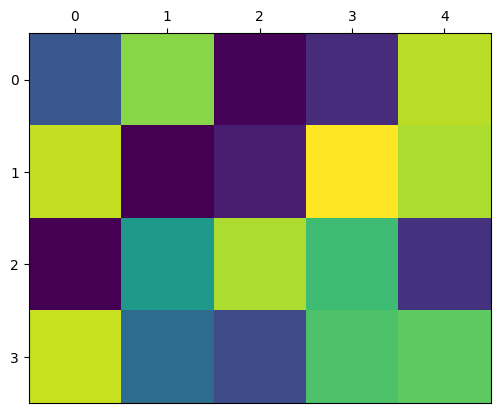

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import random
#draw heat map grid for random values in a grid of 10x10

#generate random values
#the grid with be 4x5
random_values = np.random.randint(0, 100, size=(4, 5))

#set value on 1,1 to 0
random_values[1, 1] = 0
print(random_values)


fig, ax = plt.subplots()

#change the ticks to 0 to 4
ax.set_xticks(np.arange(0, 5, 1))
ax.set_yticks(np.arange(0, 4, 1))

#set the x axis to be on top
ax.xaxis.tick_top()
im = ax.imshow(random_values)




2 1
